In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = sns.load_dataset('anscombe')

In [56]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [57]:
df.shape

(44, 3)

In [58]:
df['dataset'].value_counts()

III    11
IV     11
II     11
I      11
Name: dataset, dtype: int64

In [59]:
def split_df_into_xy_dataset(df, dataset_label):
    return df[df['dataset']==dataset_label]['x'], df[df['dataset']==dataset_label]['y']

x1, y1 = split_df_into_xy_dataset(df, "I")
x2, y2 = split_df_into_xy_dataset(df, "II")
x3, y3 = split_df_into_xy_dataset(df, "III")
x4, y4 = split_df_into_xy_dataset(df, "IV")

# Convenience list for iterating through all datasets.
all_xy_pairs = [
    (x1, y1),
    (x2, y2),
    (x3, y3),
    (x4, y4)
]

dataset_names = ['I', 'II', 'III', 'IV']

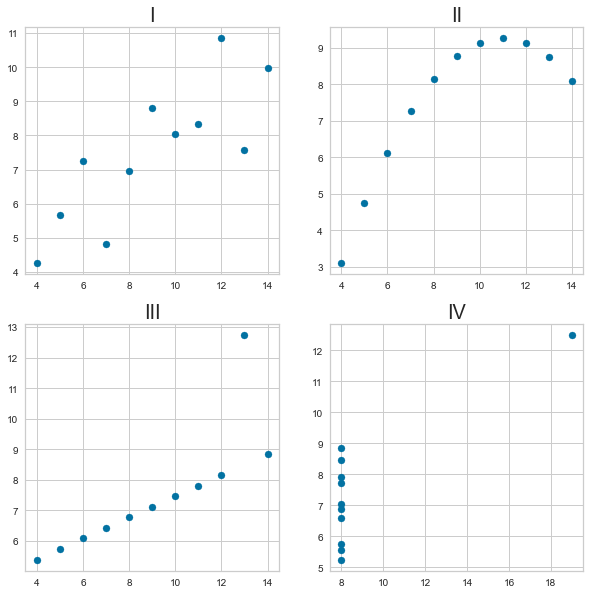

In [60]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

for i, (name, (x, y)) in enumerate(zip(dataset_names, all_xy_pairs)):
    axs[i].set_title(name, fontsize=20)
    axs[i].scatter(x, y)

plt.show()

In [61]:
anscombe4 = df[df.dataset == 'IV']

In [62]:
X = anscombe4.x.to_numpy().reshape(-1,1)
y = anscombe4.y.to_numpy().reshape(-1,1)

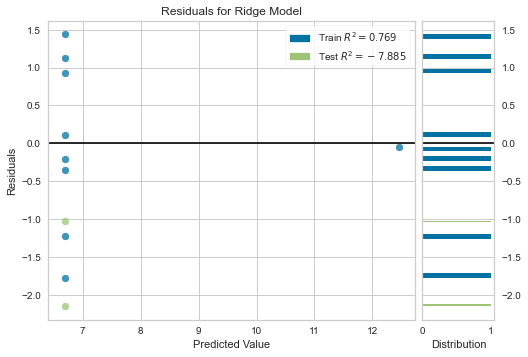

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [63]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()                 

# Part - 2

In [138]:
from sklearn.datasets import load_wine
wine_data = load_wine()

In [139]:
wine_data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [140]:
wine_data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [141]:
wine_array = np.concatenate((wine_data.data, wine_data.target.reshape(-1, 1)), axis=1)
wine_df = pd.DataFrame(wine_array)
wine_data_df = pd.DataFrame(wine_data.data)
wine_target_df = pd.DataFrame(wine_data.target.reshape(-1, 1))

In [142]:
wine_data_df.shape

(178, 13)

In [143]:
wine_target_df.shape

(178, 1)

In [144]:
wine_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [145]:
X = wine_data_df
y = wine_target_df

In [146]:
X.shape

(178, 13)

In [147]:
y.shape

(178, 1)

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [108]:
kf = KFold(n_splits=2, shuffle=False)

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

lm = LinearRegression()

scores = cross_val_score(lm, X, y, cv=2)
print(scores)

[-4.56601016 -1.77884505]


In [110]:
kf = KFold(n_splits=3, shuffle=False)

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

lm = LinearRegression()

scores = cross_val_score(lm, X, y, cv=3)
print(scores)

[-73.46648267   0.          -6.64995487]


In [112]:
kf = KFold(n_splits=5, shuffle=False)

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import metrics

lm = LinearRegression()

scores = cross_val_score(lm, X, y, cv=5)
print(scores)

[0.         0.51460008 0.         0.40252695 0.        ]


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [120]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
print(r2_score(y_test, y_pred))

0.8436193575843112


In [121]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
model_pred = lin_reg.predict(X)
print(r2_score(y, model_pred))

0.9000888589448974


In [127]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [128]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_pred = lin_reg_2.predict(X_poly)
print(r2_score(y, y_pred))

0.9394037569831758


In [129]:
from sklearn.linear_model import Ridge

model_rr = PolynomialFeatures(degree = 2)
X_poly = model_rr.fit_transform(X)

rr = Ridge(alpha=0)
rr.fit(X_poly,y)
predicted_data1 = rr.predict(X_poly)

In [130]:
print (r2_score(y,predicted_data1))

0.8815906306523672


In [131]:
rr1 = Ridge(alpha=1)
rr1.fit(X_poly,y)
predicted_data2 = rr1.predict(X_poly)

In [132]:
print (r2_score(y,predicted_data2))

0.9699762636944351


In [133]:
rr2 = Ridge(alpha=5)
rr2.fit(X_poly,y)
predicted_data3 = rr2.predict(X_poly)

In [134]:
print (r2_score(y,predicted_data3))

0.9654017905604141


(1.5848931924611107e-11, 6309573.44480193, 44.7465, 91.2435)

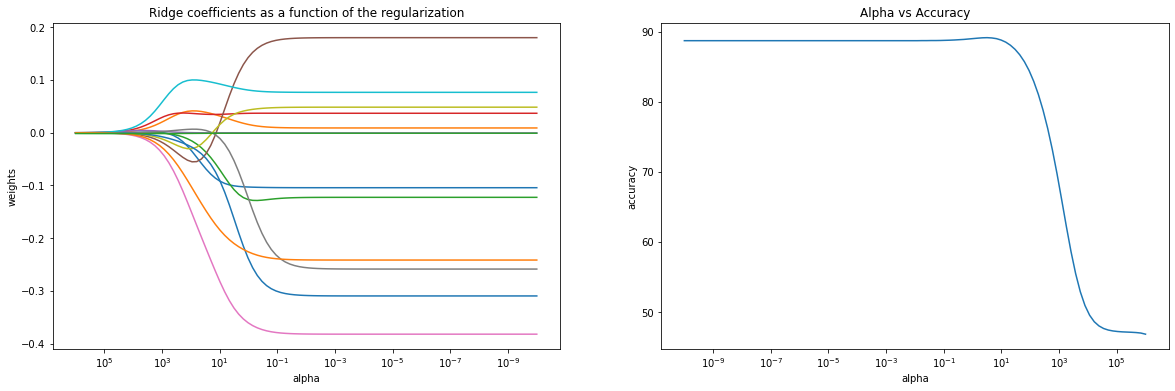

In [96]:
import warnings;
warnings.simplefilter('ignore')
n_alphas = 100
alphas = np.logspace(-10,6,n_alphas)
coefficients = []
accuracy = []
Xc = wine_data_df
Yc = wine_target_df

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, Yc, test_size = 0.3, random_state = 1)

for i, alpha in enumerate(alphas):
    ridgereg = Ridge(alpha = alpha)
    ridgereg.fit(Xc_train, yc_train)
    ridgereg.coef_ = ridgereg.coef_.reshape(13,)
    result = ridgereg.score(Xc_test, yc_test)
    accuracy.append(round(result*100.0, 2))
    coefficients.append(ridgereg.coef_)
    
plt.figure(figsize=(20,6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefficients)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, accuracy)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.title('Alpha vs Accuracy')
plt.axis('tight')

## α (alpha)  is a tuning parameter that seeks to balance between the fit of the model to the data and the magnitude of the model's coefficients:

### 1. A tiny α imposes no penalty on the coefficient size, and is equivalent to a normal linear regression.
### 2. Increasing α penalizes the coefficients and thus shrinks them towards zero.